# 第I部
# 第7章 分散分析

In [1]:
pkgs <- c("pipeR", "dplyr", "tidyr", "ggplot2", "readr", "readxl")
lapply(pkgs, require, character.only = TRUE)

Loading required package: pipeR
Loading required package: dplyr
Warning message:
: package 'dplyr' was built under R version 3.3.1
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: tidyr
Loading required package: ggplot2
Loading required package: readr
Loading required package: readxl


[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

In [2]:
d <- read_csv("teaching_methods.csv")
head(d)

,ID,名前,性別,数学,統計,心理学テスト,統計テスト1,統計テスト2,指導法
1,1,大村,男,嫌い,好き,13,6,10,C
2,2,本多,男,嫌い,好き,14,10,13,B
3,3,川崎,男,好き,好き,7,6,8,B
4,4,多村,男,好き,好き,12,10,15,A
5,5,松中,男,嫌い,嫌い,10,5,8,B
6,6,小久保,男,嫌い,嫌い,6,3,6,C


In [3]:
str(d)

Classes 'tbl_df', 'tbl' and 'data.frame':	20 obs. of  9 variables:
 $ ID          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 名前        : chr  "大村" "本多" "川崎" "多村" ...
 $ 性別        : chr  "男" "男" "男" "男" ...
 $ 数学        : chr  "嫌い" "嫌い" "好き" "好き" ...
 $ 統計        : chr  "好き" "好き" "好き" "好き" ...
 $ 心理学テスト: int  13 14 7 12 10 6 8 15 4 14 ...
 $ 統計テスト1 : int  6 10 6 10 5 3 5 9 3 3 ...
 $ 統計テスト2 : int  10 13 8 15 8 6 9 10 7 3 ...
 $ 指導法      : chr  "C" "B" "B" "A" ...


In [4]:
names(d) <- c("id", "name", "sex","math", "stat", "psy_test", "stat_test1", "stat_test2", "teaching_method")

In [5]:
library(rlist)

Warning message:
: package 'rlist' was built under R version 3.3.1

In [6]:
library(purrr)

Warning message:
: package 'purrr' was built under R version 3.3.1
Attaching package: 'purrr'

The following objects are masked from 'package:dplyr':

    contains, order_by



* 指導法ごとの統計テスト2の点数

In [7]:
d %>>% 
#     dplyr::select(stat_test2, teaching_method) %>>% 
    split(.$teaching_method) %>>% 
    purrr::map(~ .[["stat_test2"]]) %>>% 
    rlist::list.cbind()

A,B,C,D
15,13,10,10
9,8,6,7
18,8,11,3
14,12,7,5
18,7,12,7


## 7.1 一元配置分散分析（対応なし）

* 帰無仮説: 4群の母平均は等しい
* 検定統計量$F$: 帰無仮説が正しいとき，自由度$df_1$，$df_2$のF分布に従う

$$ F = \frac{\mbox{群間平方和 / 群間の自由度}}{\mbox{群内平方和 / 群内の自由度}} $$

In [8]:
?df

In [9]:
options(repr.plot.width = 4, repr.plot.height = 4)

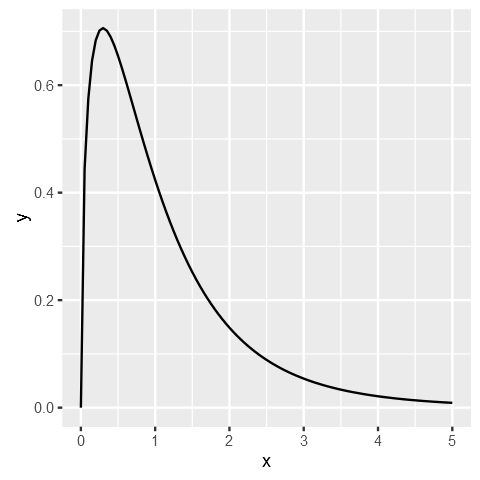

In [10]:
ggplot(data.frame(x = c(0:5)), aes(x)) + 
    stat_function(fun = df, args = list(df1 = 3, df2 = 16))

* 有意水準: 5%，片側検定
* 検定統計量の実現値

In [11]:
dd <- d %>>% 
    select(stat_test2, teaching_method) %>>% 
    mutate(teaching_method = factor(teaching_method))
str(dd)

Classes 'tbl_df', 'tbl' and 'data.frame':	20 obs. of  2 variables:
 $ stat_test2     : int  10 13 8 15 8 6 9 10 7 3 ...
 $ teaching_method: Factor w/ 4 levels "A","B","C","D": 3 2 2 1 2 3 1 4 4 4 ...


* `oneway.test()`

In [12]:
oneway.test(dd$stat_test2 ~ dd$teaching_method, var.equal = TRUE)


	One-way analysis of means

data:  dd$stat_test2 and dd$teaching_method
F = 7.1111, num df = 3, denom df = 16, p-value = 0.002988


* `aov()`

In [13]:
aov(dd$stat_test2 ~ dd$teaching_method)

Call:
   aov(formula = dd$stat_test2 ~ dd$teaching_method)

Terms:
                dd$teaching_method Residuals
Sum of Squares                 184       138
Deg. of Freedom                  3        16

Residual standard error: 2.936835
Estimated effects may be unbalanced

In [14]:
aov(dd$stat_test2 ~ dd$teaching_method) %>>% summary

                   Df Sum Sq Mean Sq F value  Pr(>F)   
dd$teaching_method  3    184   61.33   7.111 0.00299 **
Residuals          16    138    8.62                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

* `anova()`

In [15]:
lm(dd$stat_test2 ~ dd$teaching_method) %>>% anova

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
dd$teaching_method,3.000000e+00,1.840000e+02,6.133333e+01,7.111111e+00,2.987783e-03
Residuals,16.000,138.000,8.625,NA,NA


### 7.1.2 平方和の分解

* 群内平方和

In [16]:
intra_group_sq_sum <- dd %>>% 
    group_by(teaching_method) %>>%
    mutate_each(funs(my_fun = stat_test2 - mean(stat_test2))) %>>%
    ungroup %>>%
    mutate(stat_test2 = stat_test2^2) %>>%
    summarise(res = sum(stat_test2)) %>>%
    (.[["res"]])
intra_group_sq_sum

[1] 2322

* 群間平方和

In [17]:
all_mean <- dd$stat_test2 %>>% mean
inter_group_sq_sum <- dd %>>% 
    group_by(teaching_method) %>>%
    summarise_each(funs(mean, n())) %>>%
    mutate(dev_sq_sum = (mean - all_mean)^2 * n) %>>%
    summarise(res = sum(dev_sq_sum)) %>>%
    (.[["res"]])
inter_group_sq_sum

[1] 184

* 全体平方和

In [18]:
all_sq_sum <- dd %>>% 
    mutate(dev_sq_sum = (stat_test2 - all_mean)^2) %>>%
    summarise(res = sum(dev_sq_sum)) %>>%
    (.[["res"]])
all_sq_sum

[1] 322

分散分析表との対応を見る

In [19]:
aov(dd$stat_test2 ~ dd$teaching_method) %>>% summary

                   Df Sum Sq Mean Sq F value  Pr(>F)   
dd$teaching_method  3    184   61.33   7.111 0.00299 **
Residuals          16    138    8.62                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

* 全体平方和 = 群間平方和 + 群内平方和

In [20]:
inter_group_sq_sum + intra_group_sq_sum

[1] 2506

自由度

* 群間: 群の数 - 1

In [21]:
df_inter <- (unique(dd$teaching_method) %>>% length) - 1
df_inter

[1] 3

* 郡内: sum(各群のデータ数 - 1)

In [22]:
df_intra <- dd %>>% 
    group_by(teaching_method) %>>% 
    summarise(n = n()) %>>%
    ungroup %>>%
    summarise(res = sum(n - 1)) %>>%
    (.[["res"]])
df_intra

[1] 16

* 全データ: 全データ数 - 1

In [23]:
df_all <- length(dd$stat_test2) - 1
df_all

[1] 19

全データ = 群間 + 群内

In [24]:
df_inter + df_intra

[1] 19

群間平均平方

In [25]:
inter_mean_sq <- inter_group_sq_sum / df_inter
inter_mean_sq

[1] 61.33333

群内平均平方

In [26]:
intra_mean_sq <- intra_group_sq_sum / df_intra
intra_mean_sq

[1] 145.125

全体平方和を全体の自由度で割った平均平方は、全データの不偏分散となる

In [27]:
all_sq_sum / df_all

[1] 16.94737

In [28]:
var(d$stat_test2)

[1] 16.94737

* $F$ 値

In [29]:
f_value <- inter_mean_sq / intra_mean_sq
f_value

[1] 0.4226242

### 多重比較（Tukey）

* どの群とどの群に差があるかどうか
* データ数 n が等しく，各群の母分散も等しいと仮定して検定統計量$q$を求める

$$q = \frac{|\mbox{比較する群の平均値差}|}{\sqrt{\mbox{群内の平均平方} / \mbox{各群のデータ数}}}$$

In [30]:
combn(c("A", "B", "C", "D"), 2)

A,A,A,B,B,C
B,C,D,C,D,D


In [31]:
dd %>>% group_by(teaching_method) %>>% summarise(n = n())

,teaching_method,n
1,A,5
2,B,5
3,C,5
4,D,5


In [32]:
n <- dd %>>% group_by(teaching_method) %>>% summarise(n = n()) %>>% (.[["n"]][1])
n

[1] 5

In [33]:
dd %>>% 
    group_by(teaching_method) %>>% 
    summarise(gr_mean = mean(stat_test2)) %>>%
    (function(x){
        ret <- x$gr_mean
        names(ret) <- x$teaching_method
        ret
    })() %>>%
    (function(x){
        names(x) %>>% 
            combn(2) %>>% 
            apply(2, function(y){
                a <- y[1]
                b <- y[2]
                q <- abs(x[a] - x[b]) / sqrt(intra_mean_sq / n)
                cat(a, " and ", b, ": ", q, "\n")
        })
        invisible()
    })()

A  and  B :  0.9651998 
A  and  C :  1.039446 
A  and  D :  1.559169 
B  and  C :  0.07424614 
B  and  D :  0.5939691 
C  and  D :  0.519723 


In [34]:
ls.str()

all_mean :  num 10
all_sq_sum :  num 322
d : Classes 'tbl_df', 'tbl' and 'data.frame':	20 obs. of  9 variables:
 $ id             : int  1 2 3 4 5 6 7 8 9 10 ...
 $ name           : chr  "大村" "本多" "川崎" "多村" ...
 $ sex            : chr  "男" "男" "男" "男" ...
 $ math           : chr  "嫌い" "嫌い" "好き" "好き" ...
 $ stat           : chr  "好き" "好き" "好き" "好き" ...
 $ psy_test       : int  13 14 7 12 10 6 8 15 4 14 ...
 $ stat_test1     : int  6 10 6 10 5 3 5 9 3 3 ...
 $ stat_test2     : int  10 13 8 15 8 6 9 10 7 3 ...
 $ teaching_method: chr  "C" "B" "B" "A" ...
dd : Classes 'tbl_df', 'tbl' and 'data.frame':	20 obs. of  2 variables:
 $ stat_test2     : int  10 13 8 15 8 6 9 10 7 3 ...
 $ teaching_method: Factor w/ 4 levels "A","B","C","D": 3 2 2 1 2 3 1 4 4 4 ...
df_all :  num 19
df_inter :  num 3
df_intra :  num 16
f_value :  num 0.423
inter_group_sq_sum :  num 184
inter_mean_sq :  num 61.3
intra_group_sq_sum :  num 2322
intra_mean_sq :  num 145
n :  int 5
pkgs :  chr [1:6] "pipeR" "dplyr" "tidy

In [35]:
?qtukey

* 検定統計量$q$の実現値
* `qtukey()`

In [36]:
ngroup <- dd$teaching_method %>>% unique %>>% length
ngroup

[1] 4

In [37]:
qtukey(0.95, ngroup, df_intra)

[1] 4.046093

* A-C, A-D は棄却域に入った
* `TukeyHSD()` を用いると，

In [38]:
aov(dd$stat_test2 ~ dd$teaching_method) %>>% TukeyHSD

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = dd$stat_test2 ~ dd$teaching_method)

$`dd$teaching_method`
    diff        lwr        upr     p adj
B-A -5.2 -10.514108  0.1141085 0.0562227
C-A -5.6 -10.914108 -0.2858915 0.0371222
D-A -8.4 -13.714108 -3.0858915 0.0017736
C-B -0.4  -5.714108  4.9141085 0.9963241
D-B -3.2  -8.514108  2.1141085 0.3446966
D-C -2.8  -8.114108  2.5141085 0.4561325


## 7.2 一元配置分散分析（対応あり）

### 例題

In [39]:
d2 <- read_csv("chap07_2.csv", locale=locale(encoding="CP932")) # this csv file was generated by Excel
d2

,学生,線形代数,微分積分,確率統計
1,田中,7,5,8
2,岸,8,4,6
3,大引,9,7,7
4,吉川,5,1,2
5,荻野,6,3,5


In [40]:
names(d2) <- c("student", "algebra", "calculus", "probability")
str(d2)

Classes 'tbl_df', 'tbl' and 'data.frame':	5 obs. of  4 variables:
 $ student    : chr  "田中" "岸" "大引" "吉川" ...
 $ algebra    : int  7 8 9 5 6
 $ calculus   : int  5 4 7 1 3
 $ probability: int  8 6 7 2 5


### 7.2.1 対応なしとした場合

In [41]:
d2 %>>% 
    gather(subject, point , -student) %>>% head()

,student,subject,point
1,田中,algebra,7
2,岸,algebra,8
3,大引,algebra,9
4,吉川,algebra,5
5,荻野,algebra,6
6,田中,calculus,5


In [42]:
d2 %>>% 
    gather(subject, point , -student) %>>% 
    {aov(point  ~ subject, data = .)} %>>%
    summary

            Df Sum Sq Mean Sq F value Pr(>F)
subject      2  22.53  11.267   2.641  0.112
Residuals   12  51.20   4.267               

### 7.2.2 対応あり

$$ F = \frac{\mbox{条件平方和} / \mbox{条件の自由度}}{\mbox{残差平方和} / \mbox{残差の自由度}}$$

In [43]:
d2 %>>% gather(subject, point, -student) %>>%
    {aov(point ~ subject + student, data = .)} %>>%
    summary

            Df Sum Sq Mean Sq F value   Pr(>F)    
subject      2  22.53  11.267    14.7 0.002095 ** 
student      4  45.07  11.267    14.7 0.000931 ***
Residuals    8   6.13   0.767                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

棄却域は，

In [44]:
qf(0.05, 2, 8, lower.tail = FALSE)

[1] 4.45897

* Tukey多重比較

In [45]:
d2 %>>% gather(subject, point, -student) %>>%
    {aov(point ~ subject + student, data = .)} %>>% 
    TukeyHSD()

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = point ~ subject + student, data = .)

$subject
                     diff       lwr       upr     p adj
calculus-algebra     -3.0 -4.582381 -1.417619 0.0016141
probability-algebra  -1.4 -2.982381  0.182381 0.0811694
probability-calculus  1.6  0.017619  3.182381 0.0477167

$student
                diff        lwr        upr     p adj
岸-荻野    1.3333333 -1.1365377  3.8032044 0.4036928
吉川-荻野 -2.0000000 -4.4698711  0.4698711 0.1226987
大引-荻野  3.0000000  0.5301289  5.4698711 0.0186089
田中-荻野  2.0000000 -0.4698711  4.4698711 0.1226987
吉川-岸   -3.3333333 -5.8032044 -0.8634623 0.0102769
大引-岸    1.6666667 -0.8032044  4.1365377 0.2282769
田中-岸    0.6666667 -1.8032044  3.1365377 0.8766404
大引-吉川  5.0000000  2.5301289  7.4698711 0.0007714
田中-吉川  4.0000000  1.5301289  6.4698711 0.0033834
田中-大引 -1.0000000 -3.4698711  1.4698711 0.6448878


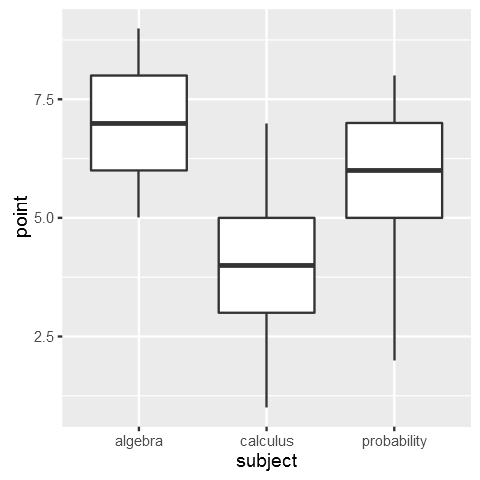

In [46]:
d2 %>>% gather(subject, point, -student) %>>%
    ggplot(aes(x = subject, y = point)) + 
    geom_boxplot()

### 7.2.4 平方和の分解と自由度の計算

* 対応なし: 全体平方和 $=$ 群間平方和 $+$ 群内平方和 
* 対応あり: 全体平方和 $=$ 条件平方和 $+$ 個人差平方和 $+$ 残差平方和

全体平方和

In [47]:
d2.long <- d2 %>>% gather(subject, point, -student)

In [48]:
all_mean <- mean(d2.long$point)
all_mean

[1] 5.533333

In [49]:
all_sq_sum <- d2.long %>>% 
    mutate(dev_sq_sum = (point - all_mean)^2) %>>%
    summarise(res = sum(dev_sq_sum)) %>>%
    (.[["res"]])
all_sq_sum

[1] 73.73333

条件平方和

In [50]:
subject_sq_sum <- d2.long %>>% 
    group_by(subject) %>>%
    summarise_each(funs(mean, n()), point) %>>%
    mutate(dev_sq_sum = (mean - all_mean)^2 * n) %>>%
    summarise(res = sum(dev_sq_sum)) %>>%
    (.[["res"]])
subject_sq_sum

[1] 22.53333

個人差平方和

In [51]:
student_sq_sum <- d2.long %>>% 
    group_by(student) %>>%
    mutate_each(funs(my_fun = mean(point) - all_mean), point) %>>%
    ungroup %>>%
    mutate(point = point^2) %>>%
    summarise(res = sum(point)) %>>%
    (.[["res"]])
student_sq_sum

[1] 533

残差平方和

In [52]:
residuals_sq_sum <- d2.long %>>% 
    group_by(student) %>>%
    mutate(mean.student = mean(point) - all_mean) %>>%
    group_by(subject) %>>%
    mutate(mean.subject = mean(point) - all_mean) %>>%
    ungroup %>>%
    mutate(point = point - all_mean - mean.student - mean.subject) %>>%
    mutate(point = point^2) %>>%
    summarise(res = sum(point)) %>>%
    (.[["res"]])
residuals_sq_sum

[1] 6.133333

分解の確認

In [53]:
all_sq_sum
subject_sq_sum + student_sq_sum + residuals_sq_sum
all_sq_sum == (subject_sq_sum + student_sq_sum + residuals_sq_sum)
identical(all_sq_sum, (subject_sq_sum + student_sq_sum + residuals_sq_sum))
all.equal(all_sq_sum, (subject_sq_sum + student_sq_sum + residuals_sq_sum))

[1] 73.73333

[1] 561.6667

[1] FALSE

[1] FALSE

[1] "Mean relative difference: 6.617541"

残差の自由度 $=$ 条件自由度 $\times$ 個人差の自由度

$F$値は，

In [54]:
(subject_sq_sum / (3 - 1)) / (residuals_sq_sum / ((3 - 1) * (5 - 1)))

[1] 14.69565

## 7.3 二元配置分散分析（対応なし）

In [55]:
d3 <- read_csv("chap07_3.csv", locale = locale(encoding="CP932"))
d3

,イカアン.A,ボスビッグ.A,ビビッテル.A,イカアン.B,ボスビッグ.B,ビビッテル.B
1,6,10,11,5,7,12
2,4,8,12,4,6,8
3,5,10,12,2,5,5
4,3,8,10,2,4,6
5,2,9,10,2,3,4


In [56]:
d3.long <- d3 %>>% 
    gather(key, taste) %>>% 
    separate(key, into = c("water", "condition"), sep = "\\.")
head(d3.long)

,water,condition,taste
1,イカアン,A,6
2,イカアン,A,4
3,イカアン,A,5
4,イカアン,A,3
5,イカアン,A,2
6,ボスビッグ,A,10


### 7.3.2

* 帰無仮説と対立仮設

要因A，要因B，AとBの交互作用効果のそれぞれに関して設定する

In [57]:
aov(taste ~ condition * water, data = d3.long) %>>% summary

                Df Sum Sq Mean Sq F value   Pr(>F)    
condition        1   67.5   67.50  21.316  0.00011 ***
water            2  155.0   77.50  24.474 1.61e-06 ***
condition:water  2   15.0    7.50   2.368  0.11515    
Residuals       24   76.0    3.17                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [58]:
aov(taste ~ condition + water + water:condition, data = d3.long) %>>% summary

                Df Sum Sq Mean Sq F value   Pr(>F)    
condition        1   67.5   67.50  21.316  0.00011 ***
water            2  155.0   77.50  24.474 1.61e-06 ***
condition:water  2   15.0    7.50   2.368  0.11515    
Residuals       24   76.0    3.17                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

平方和の分解の確認

In [59]:
d3.res <- aov(taste ~ condition * water, data = d3.long) %>>% summary
str(d3.res)

List of 1
 $ :Classes 'anova' and 'data.frame':	4 obs. of  5 variables:
  ..$ Df     : num [1:4] 1 2 2 24
  ..$ Sum Sq : num [1:4] 67.5 155 15 76
  ..$ Mean Sq: num [1:4] 67.5 77.5 7.5 3.17
  ..$ F value: num [1:4] 21.32 24.47 2.37 NA
  ..$ Pr(>F) : num [1:4] 1.10e-04 1.61e-06 1.15e-01 NA
 - attr(*, "class")= chr [1:2] "summary.aov" "listof"


In [60]:
all_sq_sum <- d3.long %>>% 
    mutate(dev_sq_sum = (taste - mean(taste))^2) %>>%
    summarise(res = sum(dev_sq_sum)) %>>%
    (.[["res"]])
all_sq_sum

[1] 313.5

In [61]:
sum(d3.res[[1]]$`Sum Sq`)

[1] 313.5

In [62]:
all.equal(all_sq_sum, sum(d3.res[[1]]$`Sum Sq`))

[1] TRUE

In [63]:
library(Cairo)

In [64]:
CairoFonts(regular = "IPAexGothic")

Warning message:
In CairoFonts(regular = "IPAexGothic"): CairoFonts() has no effect on Windows. Please use par(family="...") to specify the desired font - see ?par.

In [65]:
options(repr.plot.width = 8, repr.plot.height = 4)

png 
  2

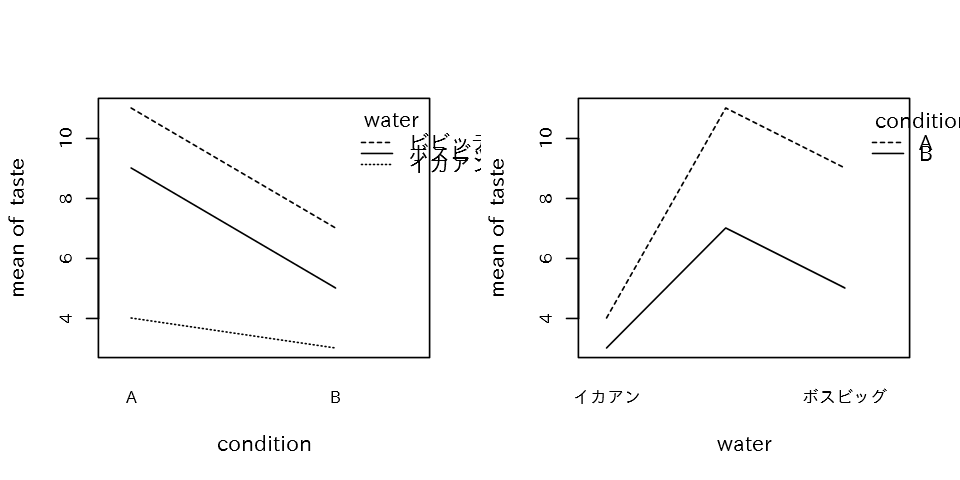

In [66]:
Cairo(type="raster")
par(family = "IPAexGothic")
par(cex.axis = 0.8)
layout(matrix(c(1, 2), 1, 2, byrow = TRUE))
with(d3.long, {
    interaction.plot(condition, water, taste)
    interaction.plot(water, condition, taste)
})
dev.off()

In [67]:
library(grid)
library(gridExtra)

Warning message:
: package 'gridExtra' was built under R version 3.3.1
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



png 
  2

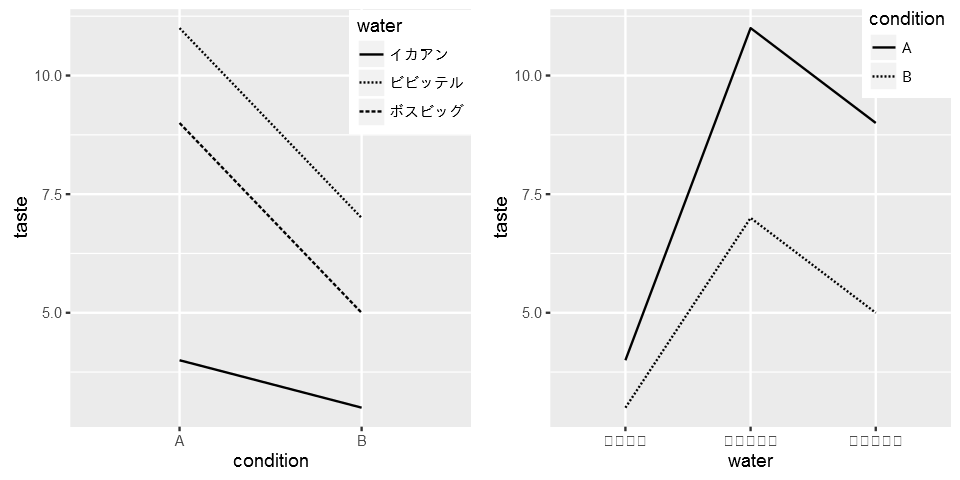

In [68]:
Cairo(type = "raster")
gp1 <- d3.long %>>% 
    ggplot(aes(x = condition, y = taste, group = water, linetype = water)) +
        stat_summary(fun.y=mean, geom="line") + 
        theme(legend.position = c(.85, .85), 
             legend.text = element_text(family="IPAexGothic"))
gp2 <- d3.long %>>% 
    ggplot(aes(x = water, y = taste, group = condition, linetype = condition)) +
        stat_summary(fun.y=mean, geom="line") +
        theme(legend.position = c(.9, .9), 
             legend.text = element_text(family="IPAexGothic"))
grid.arrange(gp1, gp2, ncol = 2)
dev.off()

### 7.3.3 温度の違いのみに注目する（銘柄の違いを無視する）

In [69]:
aov(taste ~ condition, data = d3.long) %>>% summary()

            Df Sum Sq Mean Sq F value Pr(>F)   
condition    1   67.5   67.50   7.683 0.0098 **
Residuals   28  246.0    8.79                  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

* 残差平方和が大きくなる
* 残差平方和は，二元配置の場合の銘柄，銘柄:温度の交互作用，残差 の和と一致

In [70]:
d3.res[[1]]$`Sum Sq`[1]

[1] 67.5

In [71]:
sum(d3.res[[1]]$`Sum Sq`[2:4])

[1] 246

## 7.4 二元配置分散分析(2要因とも対応あり)

In [72]:
d4 <- d3 %>>% mutate(person = c("村松","川崎","井口","松中","城島"))
d4

,イカアン.A,ボスビッグ.A,ビビッテル.A,イカアン.B,ボスビッグ.B,ビビッテル.B,person
1,6,10,11,5,7,12,村松
2,4,8,12,4,6,8,川崎
3,5,10,12,2,5,5,井口
4,3,8,10,2,4,6,松中
5,2,9,10,2,3,4,城島


In [73]:
d4.long <- d4 %>>% 
    gather(key, taste, -person) %>>% 
    separate(key, into = c("water", "condition"), sep = "\\.")
str(d4.long)

Classes 'tbl_df', 'tbl' and 'data.frame':	30 obs. of  4 variables:
 $ person   : chr  "村松" "川崎" "井口" "松中" ...
 $ water    : chr  "イカアン" "イカアン" "イカアン" "イカアン" ...
 $ condition: chr  "A" "A" "A" "A" ...
 $ taste    : int  6 4 5 3 2 10 8 10 8 9 ...


In [74]:
aov(taste ~ condition*water + 
        Error(person + person:condition + person:water + person:condition:water), data = d4.long) %>>% 
    summary


Error: person
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  4     45   11.25               

Error: person:condition
          Df Sum Sq Mean Sq F value Pr(>F)  
condition  1   67.5   67.50      18 0.0132 *
Residuals  4   15.0    3.75                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Error: person:water
          Df Sum Sq Mean Sq F value   Pr(>F)    
water      2    155    77.5     155 4.01e-07 ***
Residuals  8      4     0.5                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Error: person:condition:water
                Df Sum Sq Mean Sq F value Pr(>F)  
condition:water  2     15     7.5       5  0.039 *
Residuals        8     12     1.5                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

## 7.5 二元配置分散分析(1要因のみ対応あり)

In [75]:
d5 <- c("A", "B") %>>% 
    lapply(function(x){
        switch(x, 
              "A" = {person <- c("村松","川崎","井口","松中","城島")}, 
              "B" = {person <- c("斉藤","和田","寺原","杉内","新垣")})
        d3 %>>% 
            select(ends_with(x)) %>>% 
            mutate(person = person) %>>%
            gather(key, taste, -person) %>>% 
            separate(key, into = c("water", "condition"))
    }) %>>% 
    bind_rows 
glimpse(d5)

Observations: 30
Variables: 4
$ person    (chr) "村松", "川崎", "井口", "松中", "城島", "村松", "川崎", "井口", "松中", "城島...
$ water     (chr) "イカアン", "イカアン", "イカアン", "イカアン", "イカアン", "ボスビッグ", "ボスビッグ",...
$ condition (chr) "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A...
$ taste     (int) 6, 4, 5, 3, 2, 10, 8, 10, 8, 9, 11, 12, 12, 10, 10, 5, 4,...


In [76]:
aov(taste ~ condition * water + 
    Error(person:condition + person:condition:water), data = d5) %>>% summary

Warning message:
In aov(taste ~ condition * water + Error(person:condition + person:condition:water), : Error() model is singular


Error: person:condition
          Df Sum Sq Mean Sq F value Pr(>F)  
condition  1   67.5    67.5       9 0.0171 *
Residuals  8   60.0     7.5                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Error: person:condition:water
                Df Sum Sq Mean Sq F value   Pr(>F)    
water            2    155    77.5    77.5 5.87e-09 ***
condition:water  2     15     7.5     7.5  0.00504 ** 
Residuals       16     16     1.0                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [77]:
aov(taste ~ condition * water + 
    Error(person + person:condition + person:water + person:condition:water), data = d5) %>>% summary

Warning message:
In aov(taste ~ condition * water + Error(person + person:condition + : Error() model is singular


Error: person
          Df Sum Sq Mean Sq F value Pr(>F)  
condition  1   67.5    67.5       9 0.0171 *
Residuals  8   60.0     7.5                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Error: person:water
                Df Sum Sq Mean Sq F value   Pr(>F)    
water            2    155    77.5    77.5 5.87e-09 ***
condition:water  2     15     7.5     7.5  0.00504 ** 
Residuals       16     16     1.0                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [78]:
aov(taste ~ condition * water + 
    Error(person), data = d5) %>>% summary


Error: person
          Df Sum Sq Mean Sq F value Pr(>F)  
condition  1   67.5    67.5       9 0.0171 *
Residuals  8   60.0     7.5                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Error: Within
                Df Sum Sq Mean Sq F value   Pr(>F)    
water            2    155    77.5    77.5 5.87e-09 ***
condition:water  2     15     7.5     7.5  0.00504 ** 
Residuals       16     16     1.0                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

## 練習問題
### (1)

In [79]:
d.ex1 <- read_csv("chap07_ex1.csv", locale = locale(encoding = "cp932"), col_names = FALSE)
d.ex1

,X1,X2,X3,X4,X5,X6,X7,X8,X9
1,法学部,75,61,68,58,66,55,65,63
2,文学部,62,60,66,63,55,53,59,63
3,理学部,65,60,78,52,59,66,73,64
4,工学部,52,59,44,67,47,53,58,49


In [80]:
d.ex1 %>>% 
    (function(x){
        faculty <- x[[1]]
        ret <- x[,-1] %>>% t %>>% data.frame
        names(ret) <- faculty
        ret
    })() %>>%
     gather(fuculty, point) %>>%
    (~ d.ex1.long) %>>%
     {aov(point ~ fuculty, data = .)} %>>%
     summary

            Df Sum Sq Mean Sq F value Pr(>F)  
fuculty      3  606.4  202.13   4.515 0.0105 *
Residuals   28 1253.5   44.77                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [81]:
aov(point ~ fuculty, data = d.ex1.long) %>>% TukeyHSD

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = point ~ fuculty, data = d.ex1.long)

$fuculty
               diff       lwr       upr     p adj
文学部-工学部  6.50 -2.634092 15.634092 0.2337032
法学部-工学部 10.25  1.115908 19.384092 0.0233773
理学部-工学部 11.00  1.865908 20.134092 0.0136621
法学部-文学部  3.75 -5.384092 12.884092 0.6799312
理学部-文学部  4.50 -4.634092 13.634092 0.5430095
理学部-法学部  0.75 -8.384092  9.884092 0.9959313


### （2）

In [82]:
d.ex2 <- read_csv("chap07_ex2.csv", locale = locale(encoding = "cp932"), col_names = FALSE, col_types = "cccccccc")
d.ex2

,X1,X2,X3,X4,X5,X6,X7,X8
1,学生,森本,田中,稲葉,瀬木,高橋,工藤,金子
2,講義,51,66,70,75,73,62,55
3,問題,47,54,55,39,60,62,56
4,実習,55,37,47,60,62,53,50


In [83]:
d.ex2 %>>%
    (function(x){
        header <- enc2native(x[[1]]) # avoid UTF-8 Encoding on Windows
        student <- x[1,] %>>% unlist
        ret <- x[-1,-1] %>>% t %>>% apply(2, as.numeric) %>>% data.frame()
        ret[[student[1]]] <- student[2:length(student)]
        ret <- ret[c(4, 1:3)]
        names(ret) <- header
        ret
    })() %>>% 
    gather(type, point, -学生) %>>% 
    rename("student" = 学生) %>>%
    (~ d.ex2.long) %>>% 
    {aov(point ~ type + student, data = .)} %>>%
    summary

            Df Sum Sq Mean Sq F value Pr(>F)  
type         2  669.8   334.9   4.535 0.0341 *
student      6  411.0    68.5   0.927 0.5093  
Residuals   12  886.2    73.8                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [84]:
aov(point ~ type + student, data = d.ex2.long) %>>% TukeyHSD

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = point ~ type + student, data = d.ex2.long)

$type
                diff       lwr        upr     p adj
実習-講義 -12.571429 -24.82612 -0.3167331 0.0442785
問題-講義 -11.285714 -23.54041  0.9689812 0.0721975
問題-実習   1.285714 -10.96898 13.5404098 0.9578818

$student
                 diff       lwr      upr     p adj
金子-稲葉  -3.6666667 -28.22404 20.89070 0.9979070
工藤-稲葉   1.6666667 -22.89070 26.22404 0.9999774
高橋-稲葉   7.6666667 -16.89070 32.22404 0.9187528
森本-稲葉  -6.3333333 -30.89070 18.22404 0.9651589
瀬木-稲葉   0.6666667 -23.89070 25.22404 0.9999999
田中-稲葉  -5.0000000 -29.55737 19.55737 0.9890754
工藤-金子   5.3333333 -19.22404 29.89070 0.9848506
高橋-金子  11.3333333 -13.22404 35.89070 0.6766509
森本-金子  -2.6666667 -27.22404 21.89070 0.9996513
瀬木-金子   4.3333333 -20.22404 28.89070 0.9948269
田中-金子  -1.3333333 -25.89070 23.22404 0.9999940
高橋-工藤   6.0000000 -18.55737 30.55737 0.9730161
森本-工藤  -8.0000000 -32.55737 16.557

In [85]:
devtools::session_info()

Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------
Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------


 setting  value                       
 version  R version 3.3.0 (2016-05-03)
 system   x86_64, mingw32             
 ui       RTerm                       
 language (EN)                        
 collate  Japanese_Japan.932          
 tz       Asia/Tokyo                  
 date     2016-07-04                  

 package    * version    date       source                             
 assertthat   0.1        2013-12-06 CRAN (R 3.3.0)                     
 base64enc    0.1-3      2015-07-28 CRAN (R 3.3.0)                     
 Cairo      * 1.5-9      2015-09-26 CRAN (R 3.3.0)                     
 chron        2.3-47     2015-06-24 CRAN (R 3.3.1)                     
 colorspace   1.2-6      2015-03-11 CRAN (R 3.3.0)                     
 data.table   1.9.6      2015-09-19 CRAN (R 3.3.1)                     
 DBI          0.4-1      2016-05-08 CRAN (R 3.3.0)                     
 devtools     1.11.1     2016-04-21 CRAN (R 3.3.0)                     
 digest       0.6.9      2016-01-08 CRA